In [1]:
from __future__ import division, print_function, unicode_literals
from numpy import *
import numpy as np
import matplotlib.pyplot as mplot
import matplotlib.pylab as plt
import matplotlib.cm as cm
import pandas as pd
import scipy.stats as stats
import pylab
import warnings
warnings.filterwarnings('ignore')
import sys
sys.path.append(r'.\Not_used_or_not_found_use_yet')

In [2]:
rainfall = pd.read_csv('rainfall.csv')
rainfall.head()

,SUBDIVISION,YEAR,Parameter,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL
0,ANDAMAN & NICOBAR ISLANDS,2000.0,Actual,53.0,59.0,171.3,218.1,422.8,357.0,176.3,460.8,250.1,321.2,158.3,115.2,2763.2
1,VIDARBHA,2000.0,Actual,0.1,16.4,0.1,0.1,28.8,235.9,472.1,286.2,54.0,11.0,0.0,0.5,1105.2
2,JHARKHAND,2000.0,Actual,3.6,21.2,6.3,19.6,67.7,185.3,358.4,152.8,356.9,19.1,0.4,0.2,1191.5
3,PUNJAB,2000.0,Actual,25.4,26.6,6.9,1.3,15.3,50.1,164.8,70.0,42.0,0.0,0.7,2.2,405.3
4,GANGETIC WEST BENGAL,2000.0,Actual,9.5,57.9,3.8,54.0,215.0,205.6,341.5,178.4,428.4,76.2,1.6,0.1,1572.1


In [3]:
# rainfall.loc[rainfall.loc[:,'SUBDIVISION'] ,'SUBDIVISION'] = 
# rainfall.loc[:,'SUBDIVISION']
# np.flatnonzero(np.core.defchararray.find(rainfall.loc[:,'SUBDIVISION'],'WEST BENGAL')!=-1)
# set(rainfall1.loc[:,'SUBDIVISION'])

In [4]:
rainfall1 = rainfall.copy()
rainfall1.YEAR=rainfall1.YEAR.astype(int)
rainfall1['SUBDIVISION']=rainfall1['SUBDIVISION'].astype(str)
rainfall1.loc[[ 'MEGHALAYA' in i for i in rainfall1['SUBDIVISION']],'SUBDIVISION']='MEGHALAYA'
rainfall1.loc[[ 'ASSAM' in i for i in rainfall1['SUBDIVISION']],'SUBDIVISION']='ASSAM'
rainfall1.loc[[ 'WEST BENGAL' in i for i in rainfall1['SUBDIVISION']],'SUBDIVISION']='WEST BENGAL'
rainfall1.loc[[ 'MADHYA PRADESH' in i for i in rainfall1['SUBDIVISION']],'SUBDIVISION']='MADHYA PRADESH'
rainfall1.loc[[ 'ANDHRA PRADESH' in i for i in rainfall1['SUBDIVISION']],'SUBDIVISION']='ANDHRA PRADESH'
rainfall1.loc[[ 'RAJASTHAN' in i for i in rainfall1['SUBDIVISION']],'SUBDIVISION']='RAJASTHAN'
rainfall1.loc[[ 'KARNATAKA' in i for i in rainfall1['SUBDIVISION']],'SUBDIVISION']='KARNATAKA'
rainfall1.loc[[ 'UTTAR PRADESH' in i for i in rainfall1['SUBDIVISION']],'SUBDIVISION']='UTTAR PRADESH'
rainfall1.loc[[ 'GUJARAT' in i for i in rainfall1['SUBDIVISION']],'SUBDIVISION']='GUJARAT'
rainfall1.loc[[ 'HARYANA' in i for i in rainfall1['SUBDIVISION']],'SUBDIVISION']='HARYANA'
rainfall1.loc[[ 'GOA' in i for i in rainfall1['SUBDIVISION']],'SUBDIVISION']='GOA'
rainfall1.loc[[ 'MAHARASHTRA' in i for i in rainfall1['SUBDIVISION']],'SUBDIVISION']='MAHARASHTRA'
rainfall1.loc[[ 'MATATHWADA' in i for i in rainfall1['SUBDIVISION']],'SUBDIVISION']='MAHARASHTRA'
rainfall1.loc[[ 'KUTCH' in i for i in rainfall1['SUBDIVISION']],'SUBDIVISION']='GUJARAT'
rainfall1.loc[[ 'RAYALSEEMA' in i for i in rainfall1['SUBDIVISION']],'SUBDIVISION']='ANDHRA PRADESH'
rainfall1.loc[[ 'VIDARBHA' in i for i in rainfall1['SUBDIVISION']],'SUBDIVISION']='MAHARASHTRA'
rainfall1.loc[[ 'TRIPURA' in i for i in rainfall1['SUBDIVISION']],'SUBDIVISION']='TRIPURA'
# rainfall1.loc[[ 'KUTCH' in i for i in rainfall1['SUBDIVISION']],'SUBDIVISION']='GUJARAT'
# print(len(set(rainfall1.loc[:,'SUBDIVISION']))*16)
rainfall1.rename(columns={'SUBDIVISION':'STATES'},inplace=True)
rainfall1.head()

,STATES,YEAR,Parameter,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL
0,ANDAMAN & NICOBAR ISLANDS,2000,Actual,53.0,59.0,171.3,218.1,422.8,357.0,176.3,460.8,250.1,321.2,158.3,115.2,2763.2
1,MAHARASHTRA,2000,Actual,0.1,16.4,0.1,0.1,28.8,235.9,472.1,286.2,54.0,11.0,0.0,0.5,1105.2
2,JHARKHAND,2000,Actual,3.6,21.2,6.3,19.6,67.7,185.3,358.4,152.8,356.9,19.1,0.4,0.2,1191.5
3,PUNJAB,2000,Actual,25.4,26.6,6.9,1.3,15.3,50.1,164.8,70.0,42.0,0.0,0.7,2.2,405.3
4,WEST BENGAL,2000,Actual,9.5,57.9,3.8,54.0,215.0,205.6,341.5,178.4,428.4,76.2,1.6,0.1,1572.1


In [5]:
print(rainfall1.shape)
states = rainfall1.loc[:,'STATES'].unique()
rainfall1 = rainfall1.groupby(['STATES','YEAR'],as_index=False).mean()
print(rainfall1.shape,states)
rainfall1.head()

(576, 16)
(416, 15) ['ANDAMAN & NICOBAR ISLANDS' 'MAHARASHTRA' 'JHARKHAND' 'PUNJAB'
 'WEST BENGAL' 'KARNATAKA' 'ANDHRA PRADESH' 'TAMIL NADU'
 'HIMACHAL PRADESH' 'MADHYA PRADESH' 'CHHATTISGARH' 'KERALA' 'LAKSHADWEEP'
 'RAJASTHAN' 'GUJARAT' 'HARYANA' 'ARUNACHAL PRADESH' 'UTTARAKHAND'
 'TRIPURA' 'UTTAR PRADESH' 'ORISSA' 'BIHAR' 'TELANGANA' 'JAMMU & KASHMIR'
 'MEGHALAYA' 'GOA']


,STATES,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL
0,ANDAMAN & NICOBAR ISLANDS,2000,53.0,59.0,171.3,218.1,422.8,357.0,176.3,460.8,250.1,321.2,158.3,115.2,2763.2
1,ANDAMAN & NICOBAR ISLANDS,2001,89.0,15.7,143.3,30.1,705.3,370.7,341.3,469.0,334.4,267.6,222.6,91.8,3080.9
2,ANDAMAN & NICOBAR ISLANDS,2002,10.6,0.0,11.5,100.2,366.7,358.3,317.4,429.8,420.0,169.0,306.7,129.9,2620.2
3,ANDAMAN & NICOBAR ISLANDS,2003,44.3,7.9,149.2,19.4,296.3,159.9,494.9,379.4,371.9,310.4,74.1,48.0,2355.9
4,ANDAMAN & NICOBAR ISLANDS,2004,54.5,35.9,36.5,41.6,505.1,423.9,378.9,308.7,280.7,223.9,169.9,0.4,2460.1


In [6]:
# rainfall1.drop(columns='Parameter',inplace=True)
# raingall1 = rainfall1.iloc[:,12].unstack(level=-1).reset_index()
# rainfall1.to_csv('rainfall_cleaned.csv',sep=',',index=False)
rainfall1.head()

,STATES,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL
0,ANDAMAN & NICOBAR ISLANDS,2000,53.0,59.0,171.3,218.1,422.8,357.0,176.3,460.8,250.1,321.2,158.3,115.2,2763.2
1,ANDAMAN & NICOBAR ISLANDS,2001,89.0,15.7,143.3,30.1,705.3,370.7,341.3,469.0,334.4,267.6,222.6,91.8,3080.9
2,ANDAMAN & NICOBAR ISLANDS,2002,10.6,0.0,11.5,100.2,366.7,358.3,317.4,429.8,420.0,169.0,306.7,129.9,2620.2
3,ANDAMAN & NICOBAR ISLANDS,2003,44.3,7.9,149.2,19.4,296.3,159.9,494.9,379.4,371.9,310.4,74.1,48.0,2355.9
4,ANDAMAN & NICOBAR ISLANDS,2004,54.5,35.9,36.5,41.6,505.1,423.9,378.9,308.7,280.7,223.9,169.9,0.4,2460.1


In [7]:
# rainfall1.iloc[:,12].unstack(level=-1).reset_index()

In [8]:
crop_price=pd.read_csv("Crops_price.csv",delimiter=',')
for i in range(1,crop_price.shape[1]):
    crop_price.iloc[:,i]=pd.to_numeric(crop_price.iloc[:,i],errors='coerce')
    crop_price.iloc[:,i]=crop_price.iloc[:,i].fillna(0)
crop_price = crop_price.rename(columns = {'Commodities(rs/quin)':'Commodities'})
crop_price.head()

,Commodities,2002,2004,2005,2006,2007,2008,2009,2010,2011,2012
0,Paddy (Common),550.0,560.0,570.0,580.0,645.0,850.0,950.0,1000.0,1080,1250.0
1,Paddy (Grade ‘A’),580.0,590.0,600.0,610.0,675.0,880.0,980.0,1030.0,1110,1280.0
2,Wheat,630.0,640.0,650.0,750.0,1000.0,1080.0,1100.0,1120.0,1285,1350.0
3,Jowar (Hybrid),490.0,515.0,525.0,540.0,600.0,840.0,840.0,880.0,980,1500.0
4,Jowar (Maldandi),0.0,0.0,0.0,555.0,620.0,860.0,860.0,900.0,1000,1520.0


In [9]:
crop_prod=pd.read_csv('apy.csv',delimiter=',')
crop_prod=crop_prod.fillna(0)
crop_prod.drop(columns={'District_Name','Season' },inplace=True)
crop_prod.head()

,State_Name,Crop_Year,Crop,Area,Production
0,Andaman and Nicobar Islands,2000,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,2000,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,2000,Rice,102.0,321.0
3,Andaman and Nicobar Islands,2000,Banana,176.0,641.0
4,Andaman and Nicobar Islands,2000,Cashewnut,720.0,165.0


In [10]:
# crop_prod.State_Name.unique()
temp = crop_prod.copy()
temp = temp.loc[temp.loc[:,'Crop_Year'] >=2000,:]
# temp = temp.groupby(['State_Name','Crop_Year','Crop'],as_index=True,sort=False).mean()
# temp = temp.iloc[:,:].unstack(level=-1).reset_index()
# temp = temp.fillna(0)
# temp.columns = temp.columns.droplevel()
# temp.rename(columns = {'' : 'STATES','' : 'YEAR'},inplace = True)
# area = temp.iloc[:,:17].head()
# area.head()
temp.head()

,State_Name,Crop_Year,Crop,Area,Production
0,Andaman and Nicobar Islands,2000,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,2000,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,2000,Rice,102.0,321.0
3,Andaman and Nicobar Islands,2000,Banana,176.0,641.0
4,Andaman and Nicobar Islands,2000,Cashewnut,720.0,165.0


In [11]:
area = crop_prod.copy()
area = area.loc[area.loc[:,'Crop_Year'] >=2000,:]
area.drop(columns={'Production'},inplace=True)
area = area.groupby(['State_Name','Crop_Year','Crop'],as_index=False,sort=False).mean()
area.head()

,State_Name,Crop_Year,Crop,Area
0,Andaman and Nicobar Islands,2000,Arecanut,2177.0
1,Andaman and Nicobar Islands,2000,Other Kharif pulses,335.0
2,Andaman and Nicobar Islands,2000,Rice,5440.5
3,Andaman and Nicobar Islands,2000,Banana,853.5
4,Andaman and Nicobar Islands,2000,Cashewnut,400.0


In [12]:
production = pd.concat([crop_prod.iloc[:,0:3],crop_prod.iloc[:,4]],axis=1)
production = production.loc[production.loc[:,'Crop_Year'] >=2000,:]
production = production.groupby(['State_Name','Crop_Year','Crop'],as_index=False,sort=False).mean()
production.head()

,State_Name,Crop_Year,Crop,Production
0,Andaman and Nicobar Islands,2000,Arecanut,3600.0
1,Andaman and Nicobar Islands,2000,Other Kharif pulses,224.5
2,Andaman and Nicobar Islands,2000,Rice,16092.0
3,Andaman and Nicobar Islands,2000,Banana,6357.0
4,Andaman and Nicobar Islands,2000,Cashewnut,109.5


In [13]:
growth = pd.read_csv('Avg annual Growth Rate_Major Crops.csv',delimiter = ',')
growth = pd.concat([growth.iloc[:,0],growth.iloc[:,5:]],axis=1,sort=False)
growth.fillna(0)
growth.head()

,Crop,(Ninth Plan) 1997-98 to 2001-02,(Tenth Plan) 2002-03 to 2006-07,(Eleventh Plan) 2007-08 to 2011-12
0,Wheat,0.7,-0.3,3.0
1,Rice,2.1,1.2,2.2
2,Jowar,0.2,2.1,3.1
3,Bajra,4.9,7.3,8.4
4,Maize,3.1,-0.2,6.5


In [14]:
suicides = pd.read_csv('suicides_10-14.csv',delimiter = ',')
suicides.drop(columns={'Sl. No.','2014 - Labourers'},inplace=True)
suicides.iloc[:,:].fillna(0,inplace=True)
suicides.head()

,State/UT,2010,2011,2012,2013,2014
0,ANDHRA PRADESH,2525.0,2206.0,2572.0,2014.0,160
1,ARUNACHAL PRADESH,18.0,13.0,11.0,37.0,0
2,ASSAM,369.0,312.0,344.0,305.0,21
3,BIHAR,95.0,83.0,68.0,127.0,0
4,CHHATTISGARH,1126.0,0.0,4.0,0.0,443


In [15]:
list_area=sort(area.Crop.unique())
list_price=sort(crop_price.Commodities.unique())

In [40]:
crop_price.Commodities[crop_price.Commodities == 'Paddy']='Rice'
for item in list_price:
    for item_area in list_area:
        if item.strip() in item_area or item_area.strip() in item:
            if item != item_area:
                crop_price.Commodities[crop_price.Commodities == item]=item_area
crop_price.Commodities[crop_price.Commodities == 'Cotton F-414/H-777 ']='Cotton(lint)'
crop_price.Commodities[crop_price.Commodities == 'Cotton H-4 750 ']='Cotton(lint)'

In [41]:
crop_price = crop_price.groupby(['Commodities'],as_index=False,sort=False).sum()
crop_price.head()

,Commodities,2002,2004,2005,2006,2007,2008,2009,2010,2011,2012
0,Arhar/Tur,1325.0,1390.0,1400.0,1410.0,1550.0,2000.0,2300.0,3000.0,3200,3850.0
1,Bajra,495.0,515.0,525.0,540.0,600.0,840.0,840.0,880.0,980,1175.0
2,Barley,505.0,540.0,550.0,565.0,650.0,680.0,750.0,780.0,980,980.0
3,Cotton(lint),3590.0,3720.0,3740.0,3760.0,3830.0,5500.0,5500.0,5500.0,6100,7500.0
4,Gram,1225.0,1425.0,1435.0,1445.0,1600.0,1730.0,1760.0,2100.0,2800,3000.0


In [42]:
area_price=area.iloc[:,1:]
area_price = area_price.groupby(['Crop_Year','Crop'],as_index=True,sort=False).sum()
area_price = area_price.iloc[:,:].unstack(level=0).reset_index()
area_price = area_price.fillna(0)
area_price.columns = area_price.columns.droplevel()
area_price.rename(columns={'':'Crop'},inplace=True)
area_price = area_price[area_price['Crop'].isin(crop_price.Commodities)].sort_values(by='Crop')
area_price.drop(columns={2000,2001,2013,2014,2015},inplace=True)
area_price.columns = area_price.columns.astype(str)
area_price = area_price.reindex_axis(sorted(area_price.columns), axis=1)
# temp = area_price.iloc[:,1:].reindex_axis(sorted(area_price.iloc[:,1:].columns), axis=1)
area_price

Crop_Year,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,Crop
17,1.202607e+05,1.254464e+05,1.162934e+05,1.328360e+05,1.218050e+05,1.073274e+05,1.175985e+05,1.123132e+05,1.451039e+05,1.297995e+05,1.020973e+05,Arhar/Tur
20,2.751464e+05,3.582172e+05,3.225385e+05,3.309333e+05,3.225564e+05,2.701144e+05,2.833000e+05,2.935605e+05,3.121753e+05,1.285896e+05,1.128658e+05,Bajra
77,2.424763e+04,2.522010e+04,2.537573e+04,2.101475e+04,2.009842e+04,2.203966e+04,2.409592e+04,1.799487e+04,2.235168e+04,1.040903e+04,1.098193e+04,Barley
22,4.271419e+05,3.945531e+05,4.766634e+05,4.584527e+05,4.815980e+05,3.847991e+05,5.025324e+05,5.415774e+05,5.871145e+05,6.409828e+05,4.328917e+05,Cotton(lint)
23,1.850470e+05,2.225349e+05,2.048696e+05,2.204813e+05,2.439004e+05,2.409818e+05,2.591404e+05,2.295986e+05,2.906337e+05,2.118226e+05,2.093435e+05,Gram
18,1.792632e+05,1.738483e+05,1.929869e+05,1.980772e+05,1.644776e+05,1.862681e+05,1.771854e+05,1.554176e+05,1.690959e+05,1.342736e+05,1.144399e+05,Groundnut
25,2.139816e+05,2.175967e+05,2.171206e+05,1.079853e+05,1.957648e+05,1.096046e+05,1.693163e+05,1.831426e+05,1.594894e+05,1.230674e+05,1.133080e+05,Jowar
71,5.417165e+04,5.172045e+04,4.800347e+04,4.931876e+04,4.954699e+04,5.019066e+04,4.711659e+04,5.190434e+04,4.742854e+04,5.172814e+04,5.522720e+04,Jute
14,2.437408e+05,2.634532e+05,2.632440e+05,2.628716e+05,2.391357e+05,2.459937e+05,2.314196e+05,2.076807e+05,2.264222e+05,1.639128e+05,1.382252e+05,Maize
15,1.061918e+05,1.196879e+05,1.042200e+05,9.788403e+04,9.584429e+04,1.018935e+05,8.492464e+04,9.015427e+04,1.020953e+05,6.211630e+04,4.115588e+04,Moong(Green Gram)


In [43]:
crop_price = crop_price[crop_price['Commodities'].isin(area_price.Crop)].sort_values(by='Commodities')
crop_price.head()

,Commodities,2002,2004,2005,2006,2007,2008,2009,2010,2011,2012
0,Arhar/Tur,1325.0,1390.0,1400.0,1410.0,1550.0,2000.0,2300.0,3000.0,3200,3850.0
1,Bajra,495.0,515.0,525.0,540.0,600.0,840.0,840.0,880.0,980,1175.0
2,Barley,505.0,540.0,550.0,565.0,650.0,680.0,750.0,780.0,980,980.0
3,Cotton(lint),3590.0,3720.0,3740.0,3760.0,3830.0,5500.0,5500.0,5500.0,6100,7500.0
4,Gram,1225.0,1425.0,1435.0,1445.0,1600.0,1730.0,1760.0,2100.0,2800,3000.0


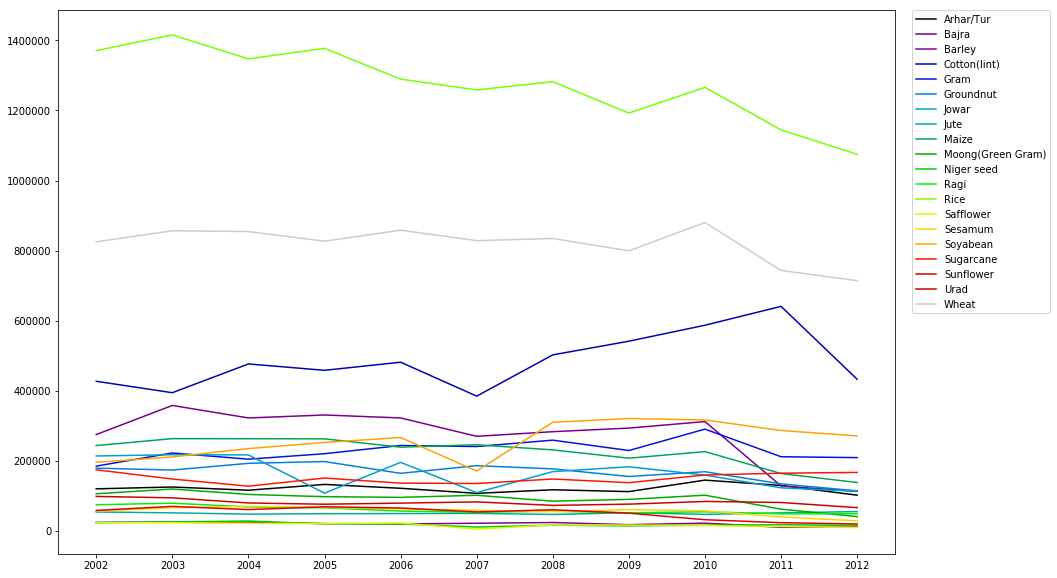

In [44]:
years= area_price.columns[1:]
fig = mplot.figure(figsize=(15,10))
ax1 = fig.add_subplot(111)
colormap = plt.cm.nipy_spectral
ax1.set_color_cycle([colormap(i) for i in np.linspace(0, 1,area_price.shape[0])])
for i in range(area_price.shape[0]):
    ax1.plot(area_price.columns[:area_price.shape[1]-1],area_price.iloc[i,:area_price.shape[1]-1])
mplot.legend(area_price.iloc[:,area_price.shape[1]-1],bbox_to_anchor=(1.02,1), borderaxespad=0)
mplot.show()

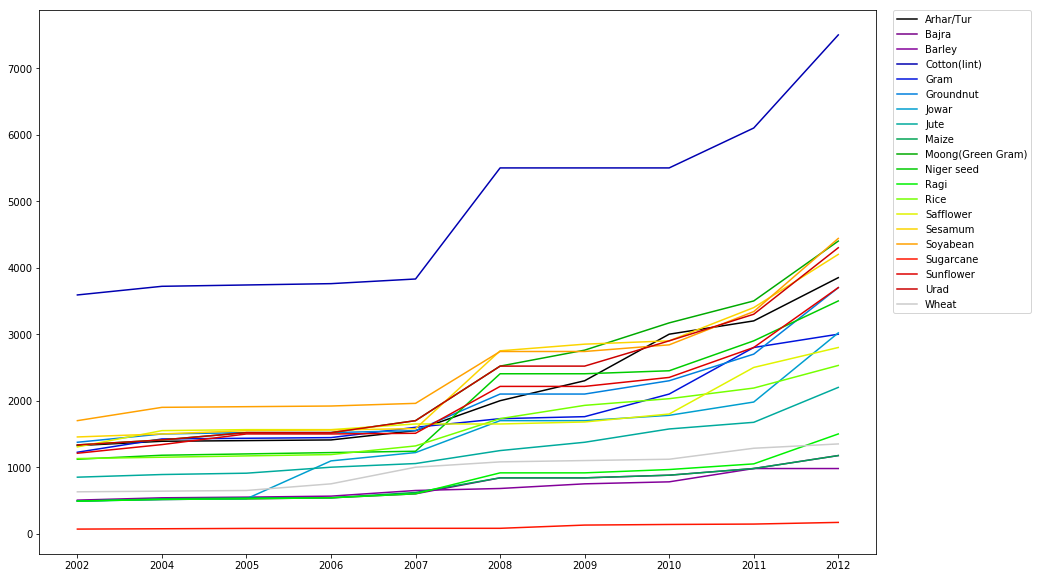

In [45]:
years= crop_price.columns[1:]
fig = mplot.figure(figsize=(15,10))
ax1 = fig.add_subplot(111)
colormap = plt.cm.nipy_spectral
ax1.set_color_cycle([colormap(i) for i in np.linspace(0, 1,crop_price.shape[0])])
for i in range(crop_price.shape[0]):
    mplot.plot(crop_price.columns[1:],crop_price.iloc[i,1:])
mplot.legend(crop_price.iloc[:,0],bbox_to_anchor=(1.02,1), borderaxespad=0)
mplot.show()

In [ ]:
i=0 
